##**Sequence-to-Sequence network for a simple prediction task. Comparing RNN, LSTM, and GRU**
##Task Description
The objective is to train three recurrent models (RNN, LSTM, GRU) to predict the next number in a numerical sequence. The models are evaluated on both Mean Absolute Error (MAE) and loss for training and validation, as well as on their ability to generalize with a test set and perform an arithmetic prediction.



In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense


In [26]:
# Data generator: Arithmetic Progression (AP)
def generate_ap_sequence(n_samples=1000):
    X, y = [], []
    for _ in range(n_samples):
        start = np.random.randint(1, 50)
        step = np.random.randint(1, 10)
        seq = [start + i * step for i in range(4)]
        X.append(seq[:3])
        y.append(seq[3])
    return np.array(X), np.array(y)

In [27]:
# Normalize (standard scale)
def normalize(X, y):
    X = np.array(X).astype(np.float32)
    y = np.array(y).astype(np.float32)
    X = X / 100.0
    y = y / 100.0
    return X.reshape((X.shape[0], 3, 1)), y



In [28]:
# Build model
def build_model(cell_type):
    model = Sequential()
    if cell_type == "RNN":
        model.add(SimpleRNN(64, input_shape=(3, 1)))
    elif cell_type == "LSTM":
        model.add(LSTM(64, input_shape=(3, 1)))
    elif cell_type == "GRU":
        model.add(GRU(64, input_shape=(3, 1)))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model



In [29]:
# Plot training history
def plot_model_history(model_type, history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["mae"], label="Train MAE")
    plt.plot(history.history["val_mae"], label="Val MAE")
    plt.title(f"{model_type} - MAE")
    plt.xlabel("Epochs")
    plt.ylabel("MAE")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title(f"{model_type} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()


Training RNN model...
RNN Test MAE: 0.0026


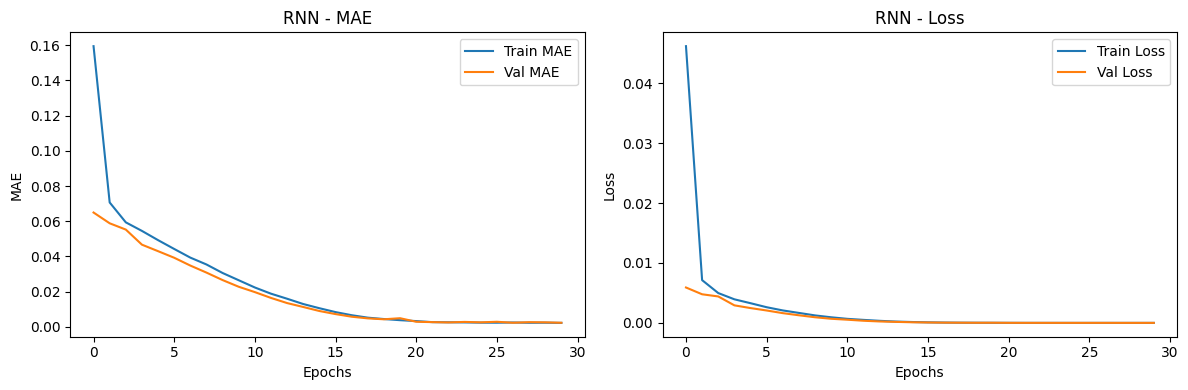

Training LSTM model...
LSTM Test MAE: 0.0446


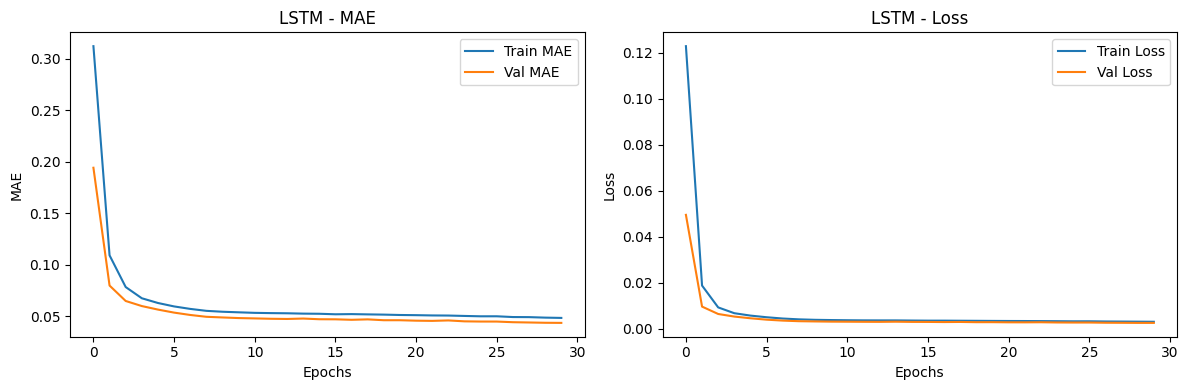

Training GRU model...
GRU Test MAE: 0.0336


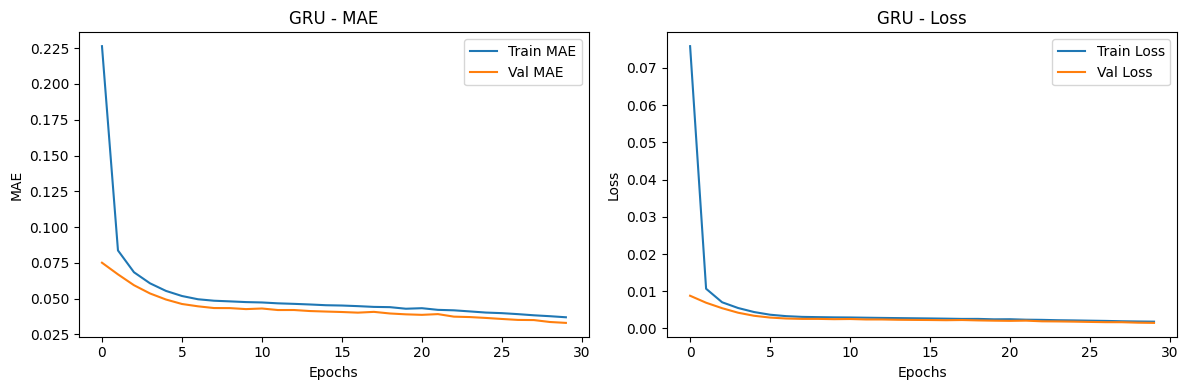

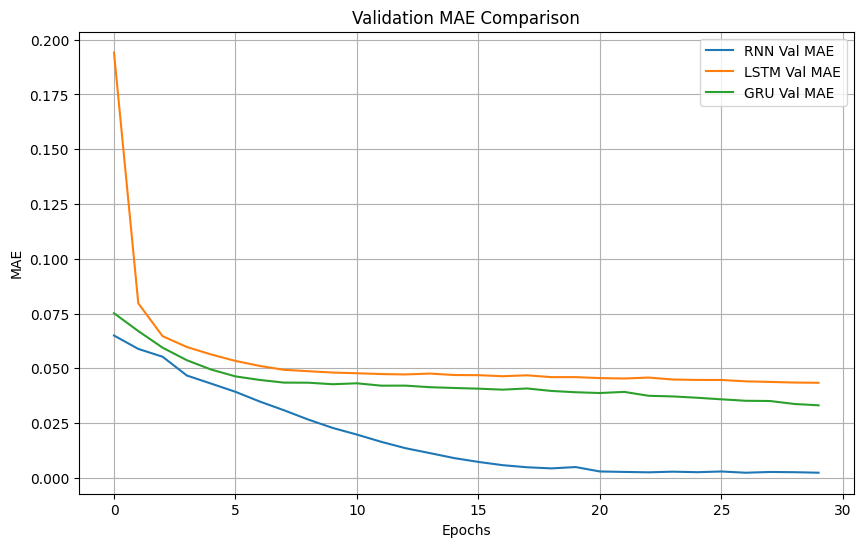

In [31]:
# Step 1: Generate & Normalize Data
X_raw, y_raw = generate_ap_sequence(1000)
X, y = normalize(X_raw, y_raw)

# Step 2: Split Data
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 3: Train Models
models = {}
histories = {}

for cell in ['RNN', 'LSTM', 'GRU']:
    print(f"Training {cell} model...")
    model = build_model(cell)
    history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)
    models[cell] = model
    histories[cell] = history
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"{cell} Test MAE: {mae:.4f}")
    plot_model_history(cell, history)

# Step 4: Combined Val MAE Comparison
plt.figure(figsize=(10, 6))
for cell in histories:
    plt.plot(histories[cell].history['val_mae'], label=f'{cell} Val MAE')
plt.title("Validation MAE Comparison")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()


In [32]:
# Step 5: Prediction on Test Input
print("\nPrediction Example (Arithmetic Progression):")
test_seq = [15, 20, 25]  # AP with step=5
input_seq = np.array(test_seq).reshape((1, 3, 1)) / 100.0

for cell in ['RNN', 'LSTM', 'GRU']:
    pred = models[cell].predict(input_seq, verbose=0)[0][0] * 100
    print(f"{cell} Prediction for sequence {test_seq} ➞ {pred:.2f}")


Prediction Example (Arithmetic Progression):
RNN Prediction for sequence [15, 20, 25] ➞ 30.08
LSTM Prediction for sequence [15, 20, 25] ➞ 29.06
GRU Prediction for sequence [15, 20, 25] ➞ 29.37


# **Summary**

Example Input Sequence:
[15, 20, 25]
(Expected Output: 30 – follows arithmetic progression of +5)

##Dataset Configuration

| Parameter             | Value                   |
| --------------------- | ----------------------- |
| Input Sequence Length | 3                       |
| Output                | 1 (next integer in seq) |
| Data Range            | 0 to 100 (integers)     |
| Samples               | Generated, normalized   |
| Target Format         | Single value prediction |
| Normalization         | MinMaxScaler            |


##Model & Training Configuration

| Component        | Specification                     |
| ---------------- | --------------------------------- |
| Input Shape      | (3, 1)                            |
| Model Variants   | SimpleRNN / LSTM / GRU (units=64) |
| Output Layer     | Dense(1)                          |
| Loss Function    | Mean Squared Error (MSE)          |
| Optimizer        | Adam                              |
| Metric           | Mean Absolute Error (MAE)         |
| Epochs           | 30                                |
| Batch Size       | 32                                |
| Validation Split | 20%                               |


##Arithmetic Progression Prediction ([15, 20, 25] ➞ 30):

| Model | Prediction |
| ----- | ---------- |
| RNN   | 30.08      |
| LSTM  | 29.06      |
| GRU   | 29.37      |



##Conclusion
For this simple numeric sequence prediction task:

-> RNN outperformed both LSTM and GRU in terms of training stability, final test error, and prediction accuracy.

-> GRU is a good compromise model with decent accuracy and quick convergence.

-> LSTM, while more powerful for complex sequences, may be overkill or suboptimal for short, arithmetic-based sequences.

-> RNN proves to be the most efficient model here, both in computational cost and performance.